LTP column not found in the data. Skipping Line Chart.


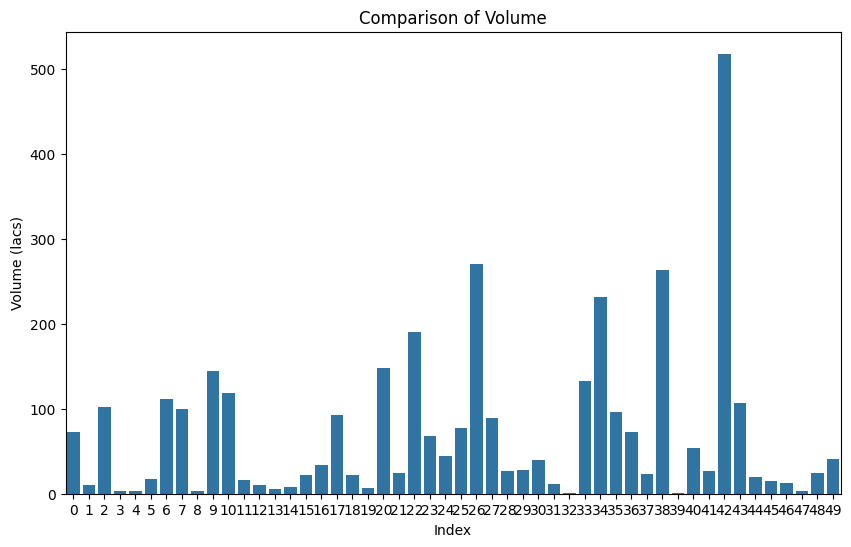

Index(['Chng', '% Chng', 'Volume (lacs)', 'Turnover (crs.)', '365 d % chng',
       '30 d % chng'],
      dtype='object')
Columns 'LTP', 'High', or 'Low' not found in the data. Skipping Candlestick Chart.


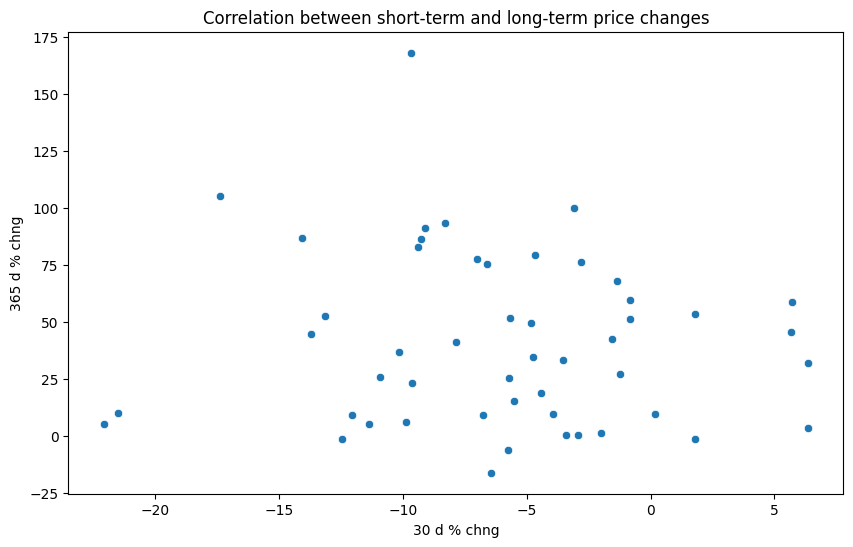

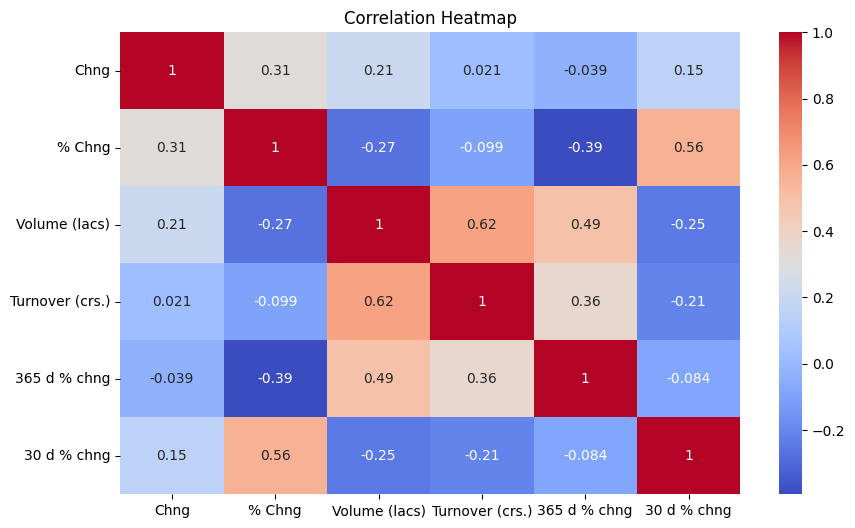

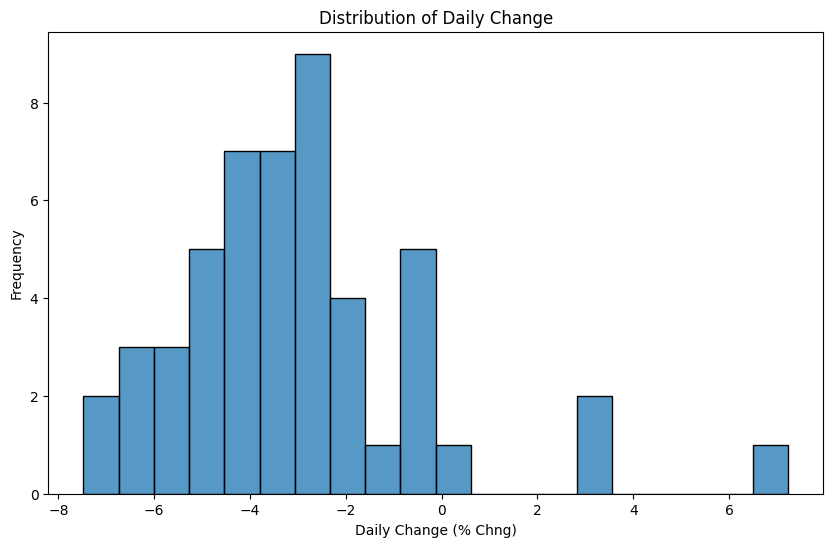

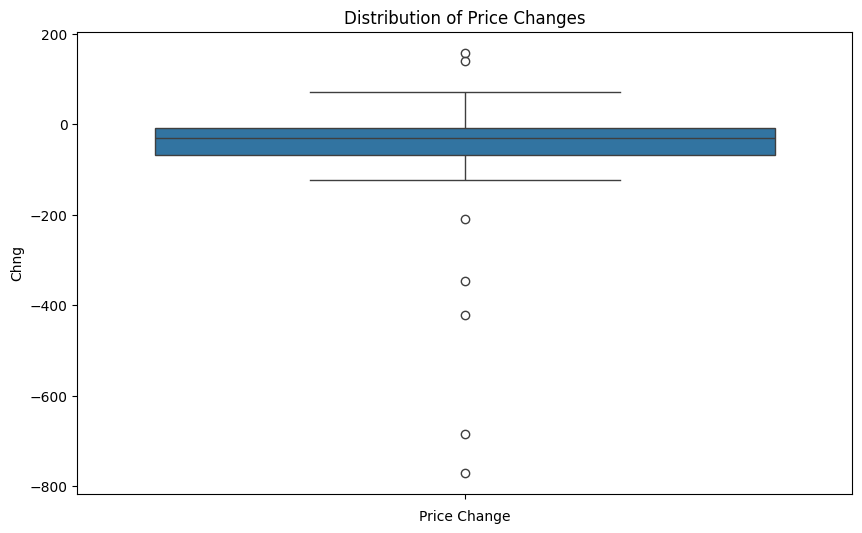

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV file
df = pd.read_csv('/content/National_Stock_Exchange_of_India_Ltd.csv')

# Data Cleaning
# Check for comma-separated values and convert to numeric (if applicable)
columns_to_clean = ['Volume (lacs)', 'Turnover (crs.)']
for col in columns_to_clean:
    if pd.api.types.is_string_dtype(df[col]):  # Check if the column is of string type
        try:
            df[col] = df[col].str.replace(',', '').astype(float)  # Replace commas and convert to float
        except ValueError:
            print(f"Error converting '{col}' to numeric. It might contain non-numeric characters.")

# Remove 'Symbol' column for visualization (assuming it's not needed)
df_numeric = df.drop(columns=['Symbol'])

# Handle missing columns gracefully (assuming 'LTP' might be missing)
try:
    # Select numeric columns for visualization
    numeric_columns = df_numeric.select_dtypes(include=['float64', 'int64']).columns
    df_numeric = df_numeric[numeric_columns]
except KeyError:
    print("Some numeric columns might be missing in the data. Check the data types.")

# Visualizations

# Line Chart - Trend of a particular stock over time (check for 'LTP' column)
if 'LTP' in df_numeric.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_numeric, x=df_numeric.index, y='LTP')
    plt.title('Trend of Last Traded Price (LTP)')
    plt.xlabel('Index')
    plt.ylabel('Last Traded Price (LTP)')
else:
    print("LTP column not found in the data. Skipping Line Chart.")
plt.show()

# Bar Chart - Comparison based on Volume
plt.figure(figsize=(10, 6))
sns.barplot(data=df_numeric, x=df_numeric.index, y='Volume (lacs)')
plt.title('Comparison of Volume')
plt.xlabel('Index')
plt.ylabel('Volume (lacs)')
plt.show()

print(df_numeric.columns)


# Candlestick Chart - Price movement over time (check for columns)
if all(col in df_numeric.columns for col in ['LTP', 'High', 'Low']):
  plt.figure(figsize=(10, 6))
  sns.lineplot(data=df_numeric[['LTP', 'High', 'Low']])
  plt.title('Price Movement (LTP, High, Low)')
  plt.xlabel('Index')
  plt.ylabel('Price')
else:
  print("Columns 'LTP', 'High', or 'Low' not found in the data. Skipping Candlestick Chart.")
plt.show()

# Scatter Plot - Correlation between short-term and long-term price changes (assuming these columns exist)
if '30 d % chng' in df_numeric.columns and '365 d % chng' in df_numeric.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_numeric, x='30 d % chng', y='365 d % chng')
    plt.title('Correlation between short-term and long-term price changes')
    plt.xlabel('30 d % chng')
    plt.ylabel('365 d % chng')
    plt.show()
else:
    print("Columns for short-term or long-term price changes not found. Skipping Scatter Plot.")

# Heatmap - Correlation between different stocks (assuming data has enough columns)
if len(df_numeric.columns) > 2:  # Check for sufficient data for heatmap
    corr_matrix = df_numeric.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("Data might not have enough columns for Heatmap. Consider including more stocks.")

# Histogram - Distribution of daily change (% Chng) in stock prices
plt.figure(figsize=(10, 6))
sns.histplot(data=df_numeric, x='% Chng', bins=20)
plt.title('Distribution of Daily Change')
plt.xlabel('Daily Change (% Chng)')
plt.ylabel('Frequency')
plt.show()

# Box Plot - Distribution of price changes for each stock (assuming 'Chng' column exists)
if 'Chng' in df_numeric.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_numeric['Chng'])
    plt.title('Distribution of Price Changes')
    plt.xlabel('Price Change')
    plt.show()


#**For Life expectancy vs gdp per capita**

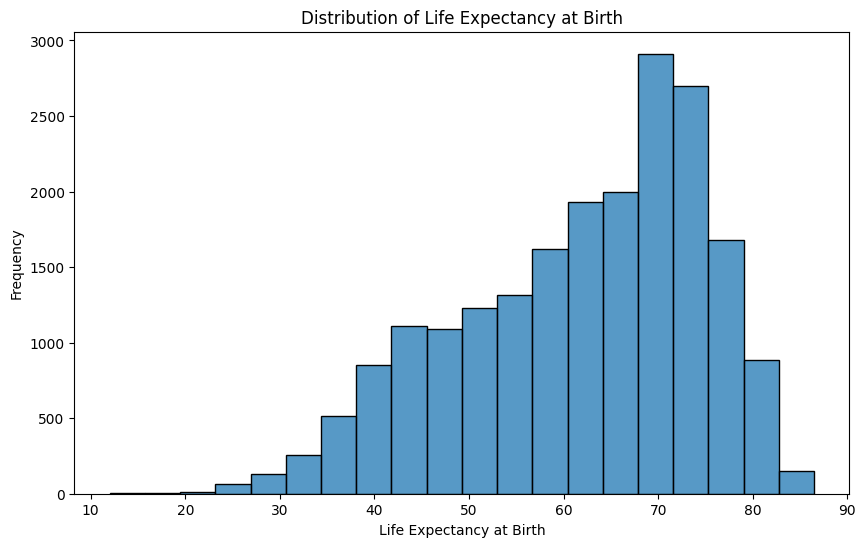

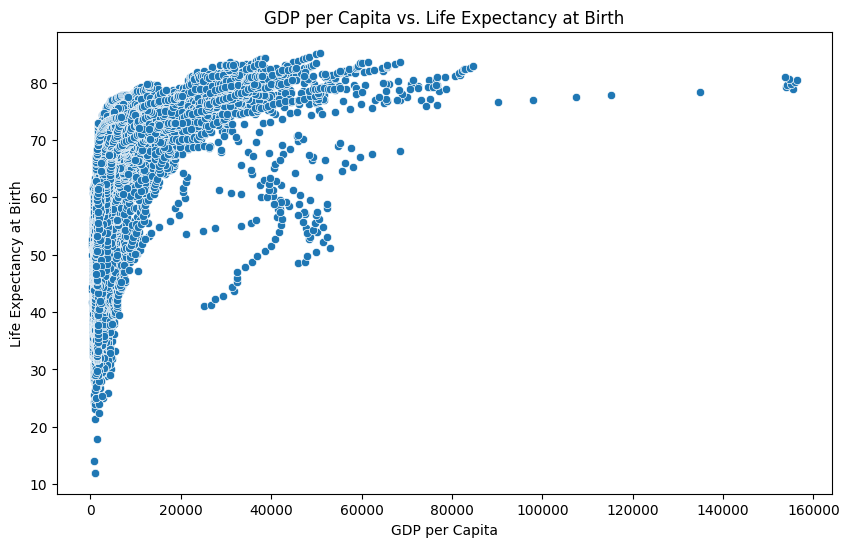

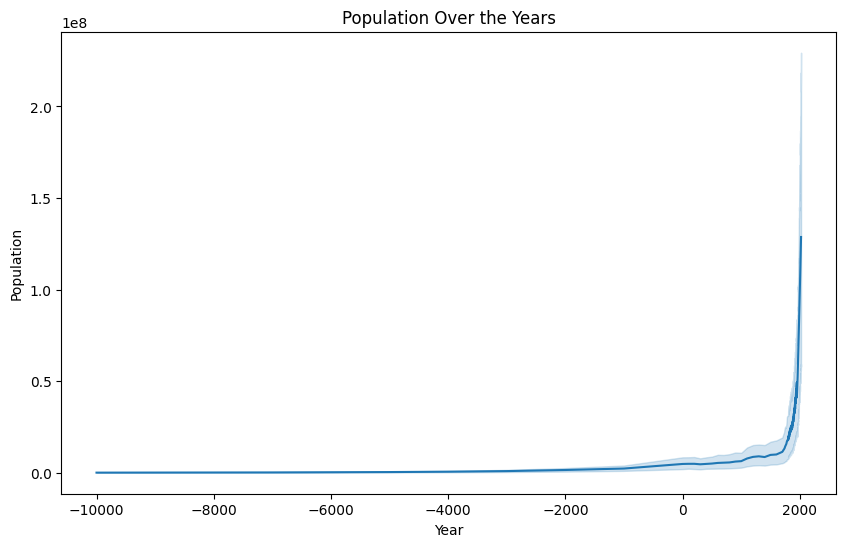

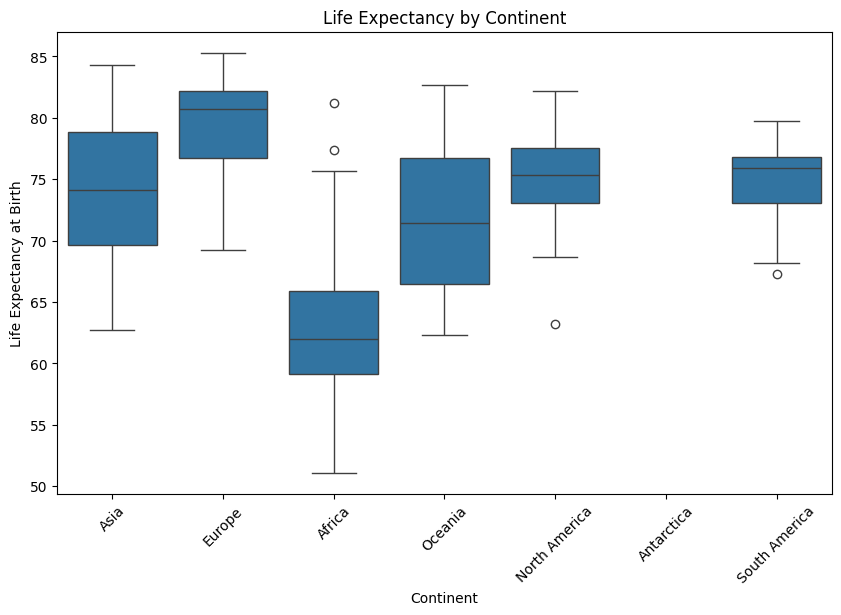

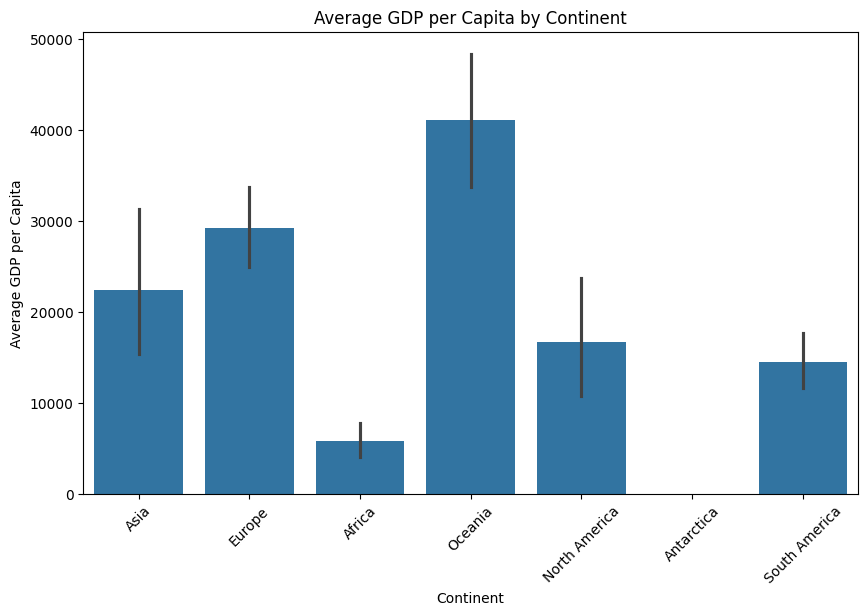

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV file
df = pd.read_csv('/content/life-expectancy-vs-gdp-per-capita - life-expectancy-vs-gdp-per-capita.csv')

# Visualizations

# Histogram of Life Expectancy at Birth
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy at birth (historical)'], bins=20)
plt.title('Distribution of Life Expectancy at Birth')
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot of GDP per Capita vs. Life Expectancy at Birth
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP per capita', y='Life expectancy at birth (historical)')
plt.title('GDP per Capita vs. Life Expectancy at Birth')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy at Birth')
plt.show()

# Line Plot of Population Over the Years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Population (historical estimates)')
plt.title('Population Over the Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

# Box Plot of Life Expectancy by Continent
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Continent', y='Life expectancy at birth (historical)')
plt.title('Life Expectancy by Continent')
plt.xlabel('Continent')
plt.ylabel('Life Expectancy at Birth')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Bar Plot of Average GDP per Capita by Continent
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Continent', y='GDP per capita', estimator=np.mean)
plt.title('Average GDP per Capita by Continent')
plt.xlabel('Continent')
plt.ylabel('Average GDP per Capita')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
